# Principal Component Analysis with Cancer Data

In [637]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [638]:
bc_df_orig = pd.read_csv('breast-cancer-wisconsin-data.csv')
bc_df_orig.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [639]:
# Id columns is to identify rows hence can be skipped in analysis
# All columns have numerical values
# Class would be the target variable. Should be removed when PCA is done
bc_df = pd.DataFrame.copy(bc_df_orig)
#bc_df = bc_df_orig.drop(['ID'],axis = 1)

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [640]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [641]:
bc_df.describe().transpose()
# Mean > median > mode - right skewed distribution
# ClumpThickness, Cell Size, Cell Shape, Marginal Adhesion, Single Epithelian Cell Size, Bare Nuclei, Normal Nucleoli 
#  & Class
# Bland Chromatin & Mitoses are left skewed

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [642]:
# We could see "?" values in column, this should be removed from data set
missing_values = bc_df.isna().sum().sum()
# Check for missing value in any other column
print("There are {} missing values in the Wisconsin dataset".format(missing_values))

There are 0 missing values in the Wisconsin dataset


In [643]:
# No missing values found. So let us try to remove ? from bare nuclei column
bc_df['Bare Nuclei'].unique()
# Get count of rows having ?

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [644]:
bc_df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [645]:
bc_df['Bare Nuclei'].replace("?",np.nan,inplace=True)

In [646]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
# imputing missing values for ? - 
# Bare nuclei has 402 entries of value '1' and 132 entries of '10' which is extreme values either side, 
# median would be suitable value to impute
bc_df = bc_df.apply(lambda x: x.fillna(x.median(),axis=0)) # imputing median value
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [647]:
bc_df['Bare Nuclei'] = bc_df['Bare Nuclei'].astype('int64')
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.2 KB


In [648]:
bc_df[bc_df.duplicated(keep = False)]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
42,1100524,6,10,10,2,8,10,7,3,3,4
62,1116116,9,10,10,1,10,8,3,3,1,4
168,1198641,3,1,1,1,2,1,3,1,1,2
207,1218860,1,1,1,1,1,1,3,1,1,2
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
267,320675,3,3,5,2,3,10,7,1,1,4
272,320675,3,3,5,2,3,10,7,1,1,4


In [649]:
bc_df.drop_duplicates(inplace = True)

In [650]:
bc_df.shape

(690, 11)

In [651]:
bc_PCA_df =bc_df.drop('ID', axis = 1)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


(10.0, 0.0)

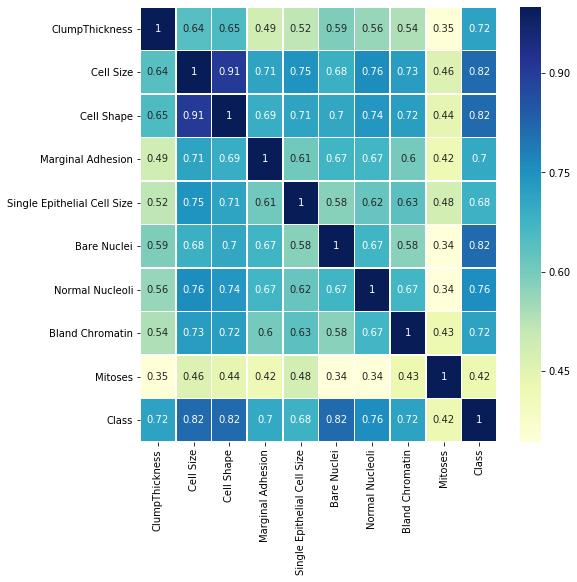

In [652]:
# Check for correlation of variable
plt.figure(figsize=(8, 8))
ax = sns.heatmap(bc_PCA_df.corr(),annot = True, linewidths = 0.5, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# Cell shape, cell size are highly correlated between them with 0.91
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, 
# normal nucleoli and bland chromatin
# Mitoses is more independent feature than others with less multi-collinearity

In [653]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

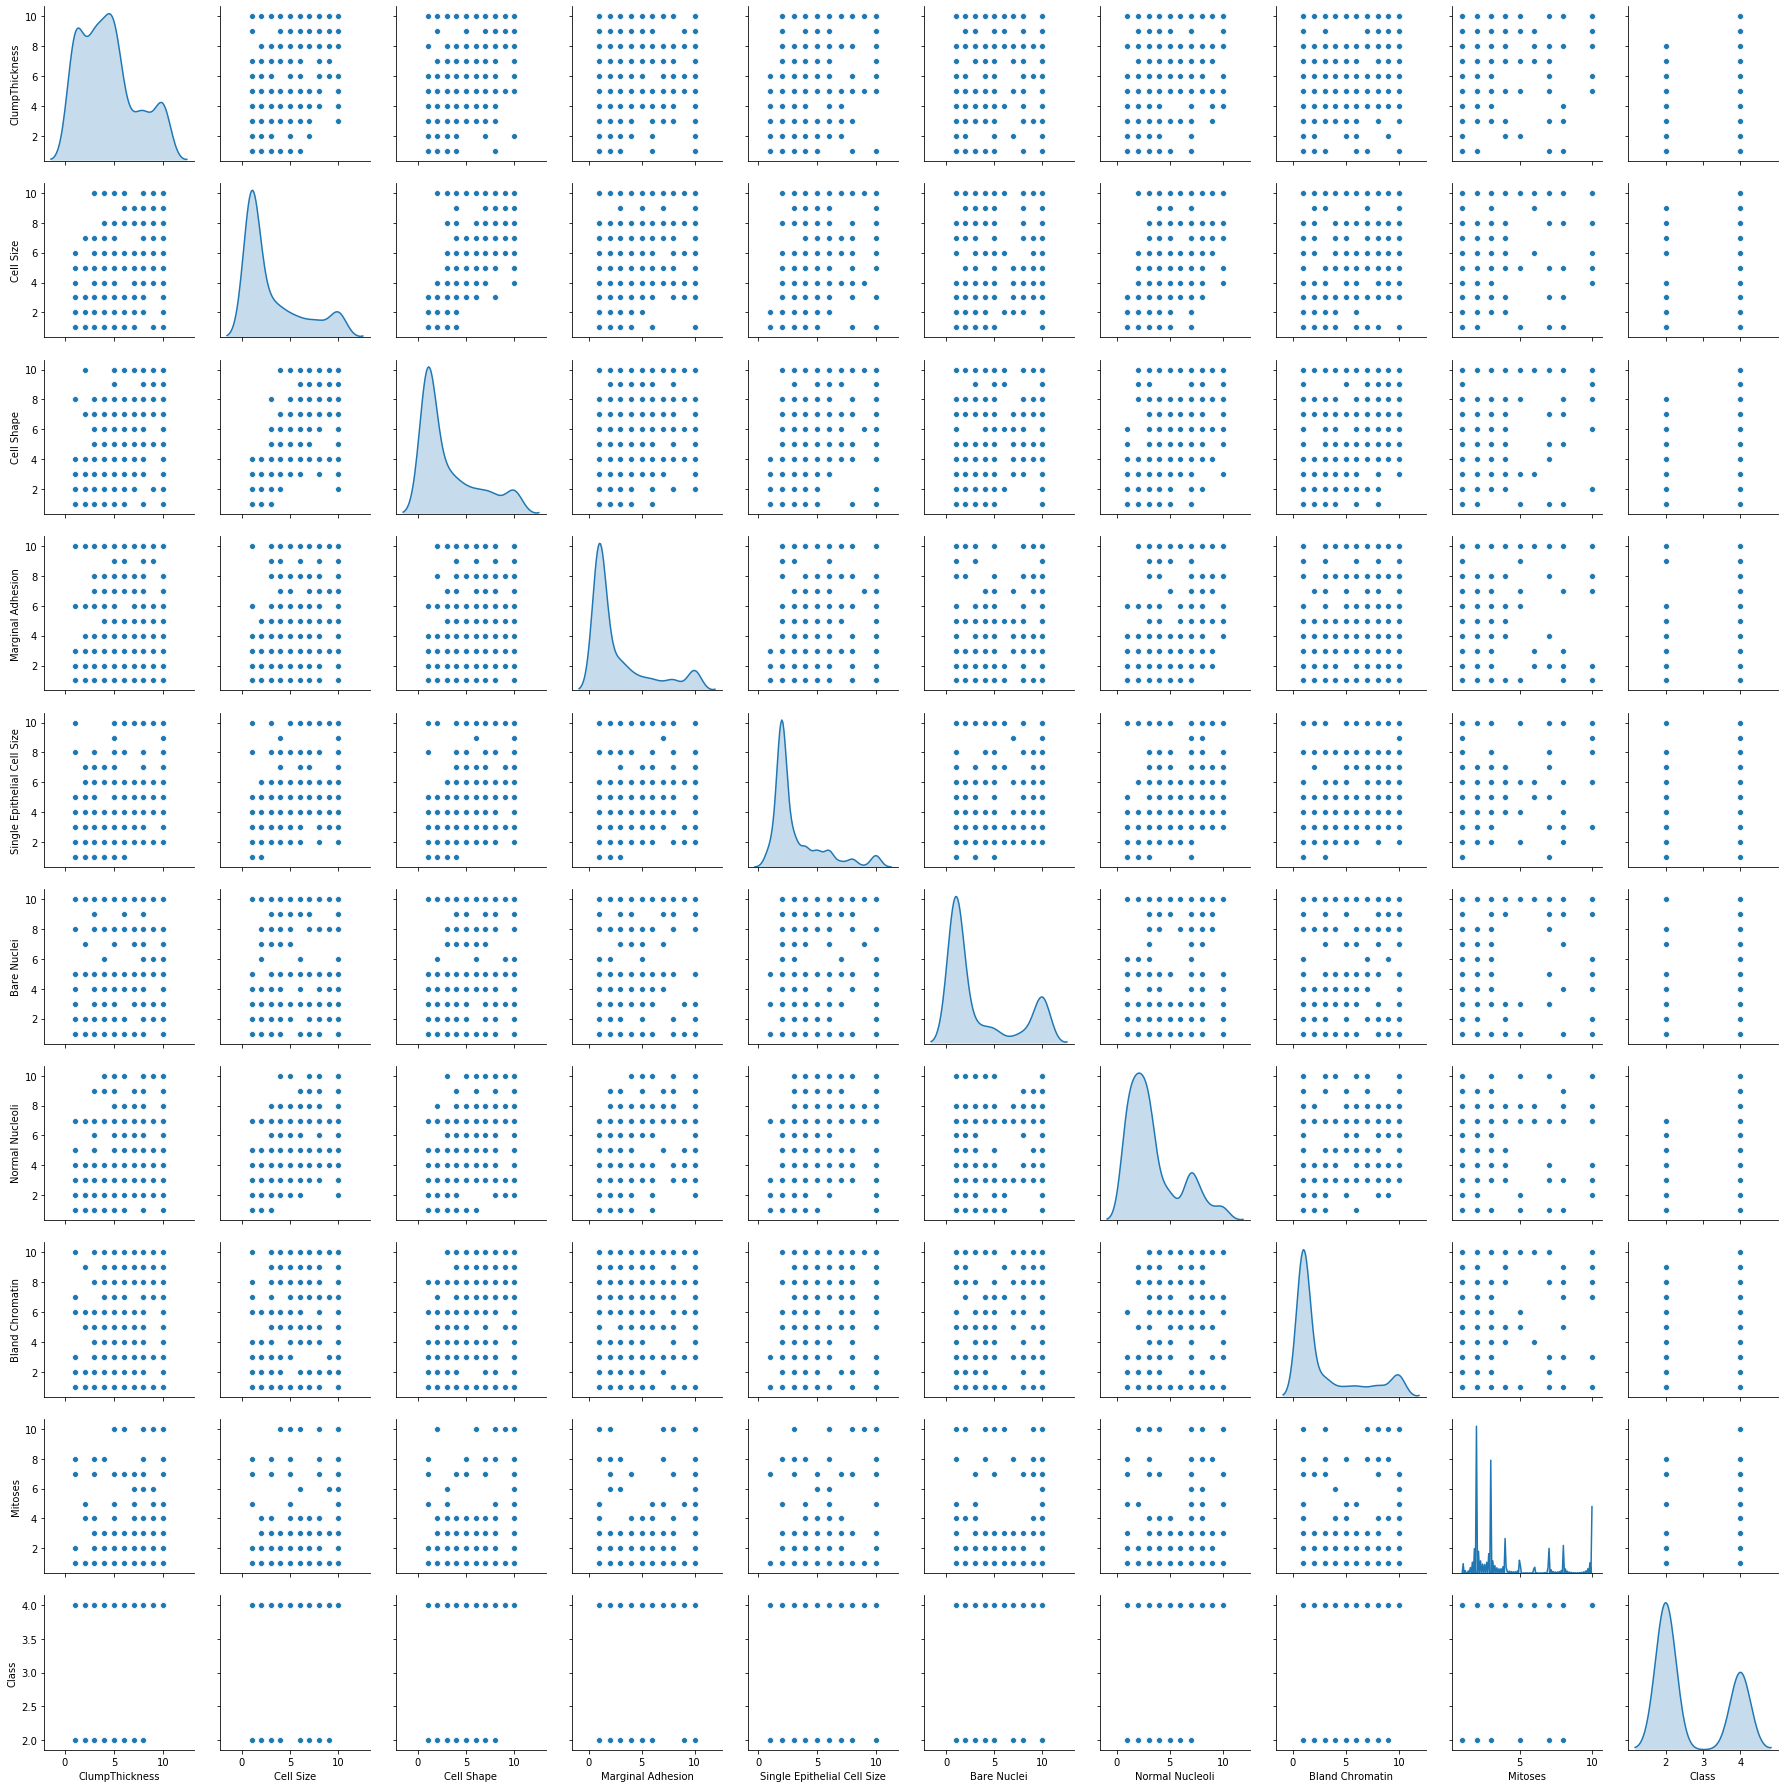

In [654]:
#Let us check for pair plots
sns.pairplot(bc_PCA_df, diag_kind = 'kde')

In [655]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, 
# though range remains same for all that is between 1 to 10


# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

4.0 -4.0 12.0
List of Outliers detected for - ClumpThickness 
  0
4.0 -5.0 11.0
List of Outliers detected for - Cell Size 
  0
4.0 -5.0 11.0
List of Outliers detected for - Cell Shape 
  0
3.0 -3.5 8.5
List of Outliers detected for - Marginal Adhesion 
  60
2.0 -1.0 7.0
List of Outliers detected for - Single Epithelial Cell Size 
  52
4.0 -5.0 11.0
List of Outliers detected for - Bare Nuclei 
  0
3.0 -2.5 9.5
List of Outliers detected for - Normal Nucleoli 
  20
3.0 -3.5 8.5
List of Outliers detected for - Bland Chromatin 
  77
0.0 1.0 1.0
List of Outliers detected for - Mitoses 
  119
2.0 -1.0 7.0
List of Outliers detected for - Class 
  0


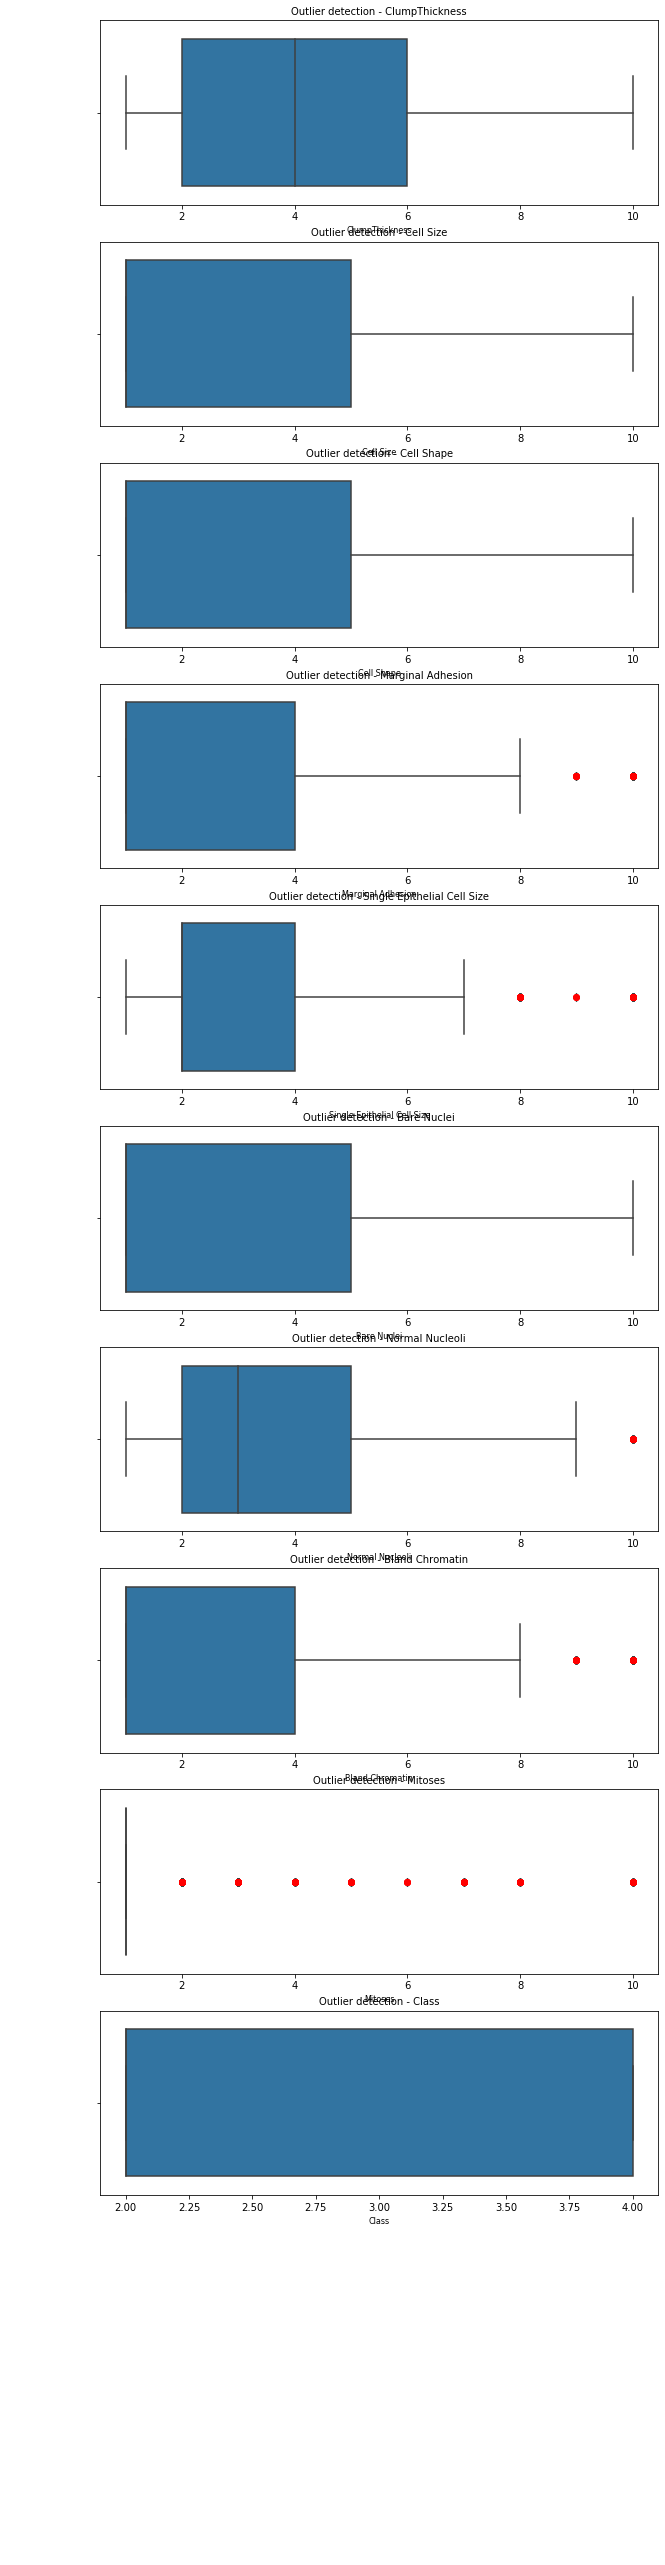

In [656]:
# Checking for Outliers in the data
# IQR based outlier identification - BoxPlot or dsitplot
def IQR_based_outlier(data, threshold = 1.5):
    IQR = np.quantile(data, 0.75) - np.quantile(data, 0.25)
    minval = np.quantile(data,0.25) - IQR * threshold
    maxval = np.quantile(data,0.75) + IQR * threshold
    print(IQR,minval,maxval)
    return (data < minval)|(data > maxval)

col_names = bc_PCA_df.select_dtypes(include=['float64','int64']).columns

fig, ax = plt.subplots(len(col_names), figsize=(10,40))

for i, col_val in enumerate(col_names):
    x = bc_PCA_df[col_val][:1000]
    sns.boxplot(x, ax=ax[i])
    outliers = x[IQR_based_outlier(x)]
    Total = outliers.value_counts().sum()
    print('List of Outliers detected for - {} \n '.format(col_val),Total)
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)
    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [657]:
def Treatoutliers(data, threshold = 1.5):
    IQR = np.quantile(data, 0.75) - np.quantile(data, 0.25) # Inter quartile Range
    outliers_below = np.quantile(data,0.25) - IQR * threshold
    outliers_above = np.quantile(data,0.75) + IQR * threshold
    median = data.median()
    # treating the outlier with median
    data = np.where(((data > outliers_above)|(data < outliers_below)), median, data) 
    return data

In [658]:
# Marginal Adhesion, Single Epithelial size, Normal Nucleoi, Bland Chromatin and Mitoses need to be treated for outliers
# We will treat them with the median values to normalize, there will still be outliers after that but very minimal
col_names = ['Marginal Adhesion', 'Single Epithelial Cell Size', 'Normal Nucleoli', 'Bland Chromatin']
for i, col_val in enumerate(col_names):
    bc_PCA_df[col_val] = Treatoutliers(bc_PCA_df[col_val])

In [659]:
pd.crosstab(bc_PCA_df['Class'], bc_PCA_df['Mitoses'])

Mitoses,1,2,3,4,5,6,7,8,10
Class,,,,,,,,,
2,439,8,2,0,1,0,1,1,0
4,132,27,30,12,5,3,8,7,14


In [660]:
# based on the analysis majortity of the values lie in the range between 1 to 3; hence treating outliers with the constant 3
bc_PCA_df['Mitoses'] = np.where(bc_PCA_df['Mitoses']> 3, 3, bc_PCA_df['Mitoses'])
pd.crosstab(bc_PCA_df['Class'], bc_PCA_df['Mitoses'])

Mitoses,1,2,3
Class,,,
2,439,8,5
4,132,27,79


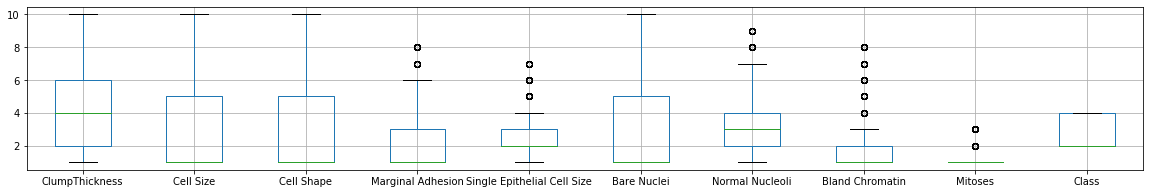

In [661]:
# Box plot of the entire dataframe after the outlier treatment
bc_PCA_df.boxplot(figsize=(20,3))

In [662]:
bc_PCA_df

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1.0,2.0,1,3.0,1.0,1,2
1,5,4,4,5.0,7.0,10,3.0,2.0,1,2
2,3,1,1,1.0,2.0,2,3.0,1.0,1,2
3,6,8,8,1.0,3.0,4,3.0,7.0,1,2
4,4,1,1,3.0,2.0,1,3.0,1.0,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1.0,3.0,2,1.0,1.0,1,2
695,2,1,1,1.0,2.0,1,1.0,1.0,1,2
696,5,10,10,3.0,7.0,3,8.0,1.0,2,4
697,4,8,6,4.0,3.0,4,3.0,6.0,1,4


In [663]:
# Standardize the data with Z-score; This is done only for feature, hence target variable class to be dropped from features
from scipy.stats import zscore
bc_std_df = bc_PCA_df.drop('Class', axis= 1)
bc_std_df = bc_std_df.apply(zscore)
bc_std_df

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.202823,-0.701698,-0.745040,-0.560427,-0.488050,-0.686858,-0.107854,-0.484128,-0.438024
1,0.202823,0.285065,0.268920,1.570123,3.148608,1.803153,-0.107854,0.051206,-0.438024
2,-0.507572,-0.701698,-0.745040,-0.560427,-0.488050,-0.410190,-0.107854,-0.484128,-0.438024
3,0.558020,1.600748,1.620866,-0.560427,0.239282,0.143146,-0.107854,2.727874,-0.438024
4,-0.152375,-0.701698,-0.745040,0.504848,-0.488050,-0.686858,-0.107854,-0.484128,-0.438024
...,...,...,...,...,...,...,...,...,...
694,-0.507572,-0.701698,-0.745040,-0.560427,0.239282,-0.410190,-1.032321,-0.484128,-0.438024
695,-0.862769,-0.701698,-0.745040,-0.560427,-0.488050,-0.686858,-1.032321,-0.484128,-0.438024
696,0.202823,2.258590,2.296839,0.504848,3.148608,-0.133522,2.203313,-0.484128,1.050827
697,-0.152375,1.600748,0.944893,1.037486,0.239282,0.143146,-0.107854,2.192540,-0.438024


# Q6 Create a covariance matrix for identifying Principal components

In [664]:
# PCA
# Step 1 - Create covariance matrix

In [665]:
cov_matrix = np.cov(bc_std_df.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00145138 0.64410677 0.65453792 0.38210551 0.43921855 0.59150555
  0.54519932 0.35858233 0.42745595]
 [0.64410677 1.00145138 0.9066632  0.51699237 0.58342197 0.68556472
  0.67755935 0.42264883 0.51098944]
 [0.65453792 0.9066632  1.00145138 0.48458778 0.56993153 0.70518656
  0.66053663 0.39482472 0.48167882]
 [0.38210551 0.51699237 0.48458778 1.00145138 0.42836191 0.48093753
  0.53621504 0.32670685 0.22606043]
 [0.43921855 0.58342197 0.56993153 0.42836191 1.00145138 0.52090409
  0.50208343 0.35618535 0.32185518]
 [0.59150555 0.68556472 0.70518656 0.48093753 0.52090409 1.00145138
  0.66138342 0.43827813 0.45258904]
 [0.54519932 0.67755935 0.66053663 0.53621504 0.50208343 0.66138342
  1.00145138 0.41279829 0.37819185]
 [0.35858233 0.42264883 0.39482472 0.32670685 0.35618535 0.43827813
  0.41279829 1.00145138 0.29430881]
 [0.42745595 0.51098944 0.48167882 0.22606043 0.32185518 0.45258904
  0.37819185 0.29430881 1.00145138]]


# Q7 Identify eigen values and eigen vector

In [666]:
# Step 2- Get eigen values and eigen vector

In [667]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.33505594 -0.01921668  0.20950184 -0.10901966  0.10802493 -0.29250481
   0.68747178  0.50751053  0.06464597]
 [-0.39876429 -0.71153986  0.08936463 -0.16049734  0.06345865  0.52364127
  -0.11367184  0.08677685 -0.04768601]
 [-0.39408139  0.69503061  0.10485548 -0.19935356 -0.04246511  0.50627967
  -0.1344982   0.17212193 -0.07111733]
 [-0.28471208  0.03614416 -0.58267225 -0.14314196 -0.10304383  0.09091351
   0.34565589 -0.43213392  0.48221887]
 [-0.30993667  0.01196203 -0.20305452 -0.07668608  0.04768071 -0.20021204
   0.14185741 -0.35012925 -0.81951934]
 [-0.36873833 -0.07304608  0.01196023 -0.01002987 -0.75953393 -0.38190819
  -0.33583256  0.13426173  0.06998069]
 [-0.35775679  0.03304339 -0.17647102 -0.0774602   0.62159278 -0.40083733
  -0.48932364  0.09591476  0.19516839]
 [-0.2519434   0.02548939 -0.17515466  0.93074973  0.03419805  0.1404922
   0.04416237  0.12402182 -0.02571598]
 [-0.26242972  0.04180197  0.70315429  0.15442592  0.07190254 -0.09648336
   0.

# Q8 Find variance and cumulative variance by each eigen vector

In [668]:
tot = sum(eigenvalues)
sorted_eigenvalues = sorted(eigenvalues, reverse=True)
var_explained = [(i / tot) * 100 for i in sorted_eigenvalues]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([ 56.65553917,  65.80650219,  73.92987467,  80.21026365,
        86.33126571,  91.07289425,  95.35033539,  98.99141893,
       100.        ])

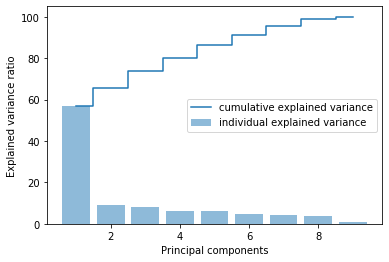

In [669]:
# Step plot
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [670]:
# Import PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)

In [671]:
# data with less dimensions
pca_df = pd.DataFrame(pca.fit_transform(bc_std_df))

In [672]:
pca.components_

array([[ 0.33505594,  0.39876429,  0.39408139,  0.28471208,  0.30993667,
         0.36873833,  0.35775679,  0.2519434 ,  0.26242972],
       [ 0.20950184,  0.08936463,  0.10485548, -0.58267225, -0.20305452,
         0.01196023, -0.17647102, -0.17515466,  0.70315429],
       [-0.10901966, -0.16049734, -0.19935356, -0.14314196, -0.07668608,
        -0.01002987, -0.0774602 ,  0.93074973,  0.15442592],
       [ 0.06464597, -0.04768601, -0.07111733,  0.48221887, -0.81951934,
         0.06998069,  0.19516839, -0.02571598,  0.20172499],
       [-0.50751053, -0.08677685, -0.17212193,  0.43213392,  0.35012925,
        -0.13426173, -0.09591476, -0.12402182,  0.59442359],
       [ 0.68747178, -0.11367184, -0.1344982 ,  0.34565589,  0.14185741,
        -0.33583256, -0.48932364,  0.04416237,  0.05097578],
       [-0.29250481,  0.52364127,  0.50627967,  0.09091351, -0.20021204,
        -0.38190819, -0.40083733,  0.1404922 , -0.09648336]])

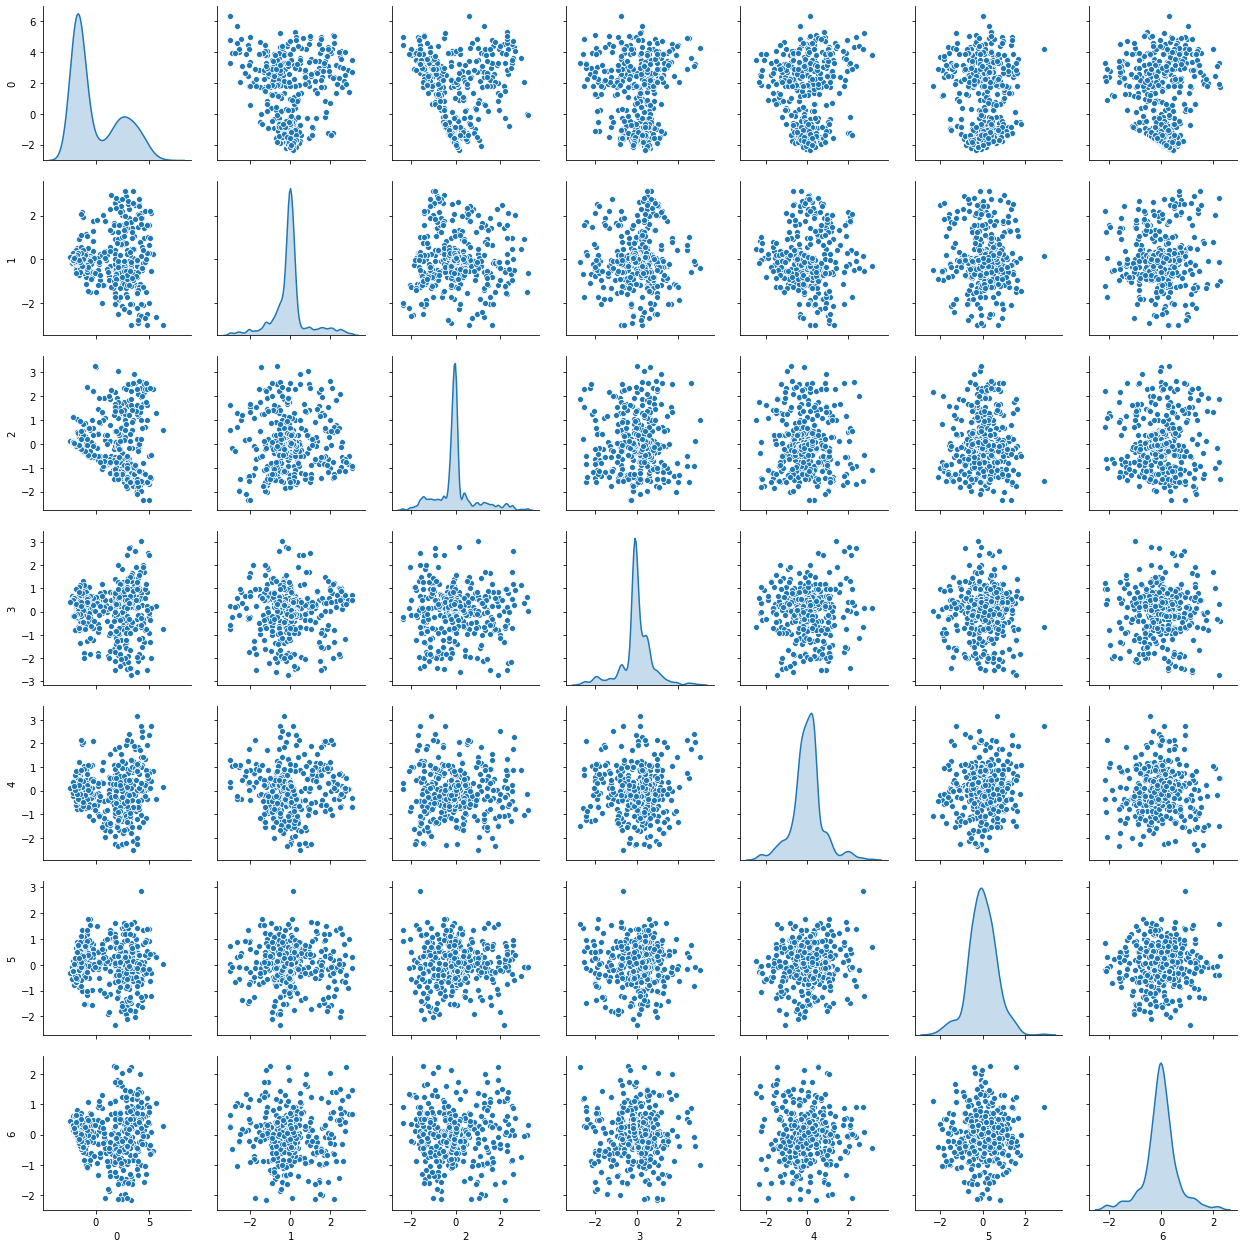

In [673]:
sns.pairplot(pca_df, diag_kind = 'kde')

# Q10 Find correlation between components and features

In [674]:
data_combined = pd.DataFrame(pca.components_,columns=list(bc_std_df))
data_combined.shape

(7, 9)

(9.0, 0.0)

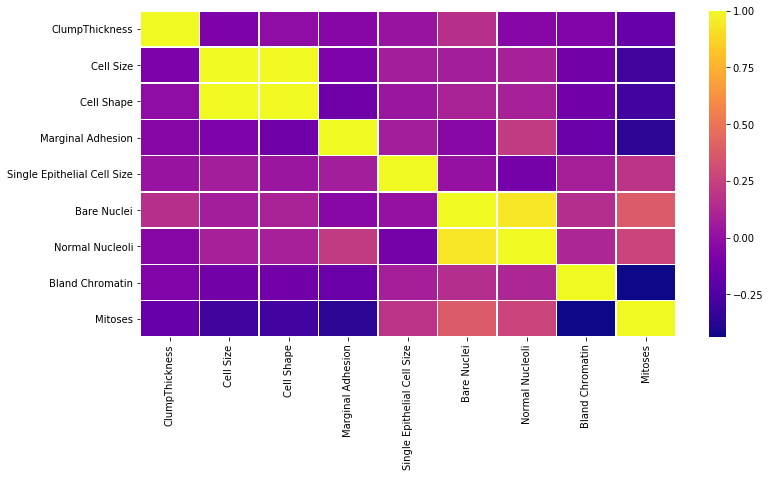

In [675]:
# Check for correlation of variable
plt.figure(figsize=(12, 6))
ax = sns.heatmap(data_combined.corr(), linewidths = 0.5, cmap="plasma")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)